### Problem 1
#### Predicting the delivery time using the sorting time

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
dataset = pd.read_csv('delivery_time.csv')
dataset.info() # No null values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dataset.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [5]:
dataset1 = dataset.rename(columns={'Delivery Time':('DT'), 'Sorting Time':'ST'})

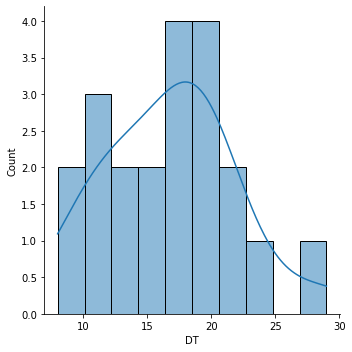

In [6]:
sns.displot(dataset1['DT'], kde=True, bins=10)

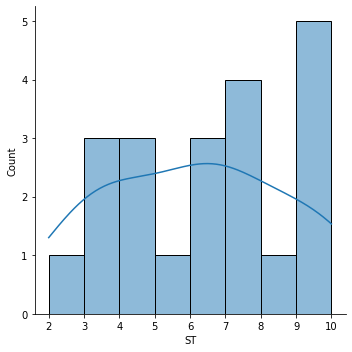

In [7]:
sns.displot(dataset1['ST'], kde=True, bins=8)

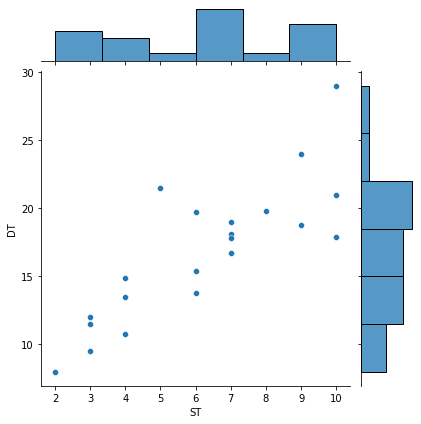

In [8]:
sns.jointplot(x='ST',y='DT',data=dataset1)

The data seems to be "somewhat" normally distributed. Now let's fit the model:

In [9]:
model = smf.ols("DT~ST",data = dataset1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        15:37:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

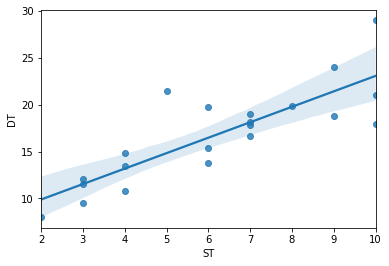

In [10]:
sns.regplot(x="ST", y="DT", data=dataset1);

### Inferences:
A model has been made for predicting the delivery time using the sorting time. The results of the Linear regression reveals that the R-squared value is 0.682 which is not that good implying that the model is weak which is not so surprising as only one variable is used for the model creation. Also, the datset is relatively small.

In [12]:
predct = pd.Series([4.6,6.3])
predct_these=pd.DataFrame(predct,columns=['ST'])
model.predict(predct_these)

0    14.168225
1    16.971559
dtype: float64